In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# <span style="color:orange"> Numerical Simulation Laboratory: Lecture 06</span>

## Exercise 01
We simulate a 1D-Ising model with pbc at different temperatures in the canonical ensemble. The PDF in phase space will be sampled both with the MH and the Gibbs' algorithm. Parameters used are $N=50, J=1, h\in \{0, 0.02\}$. In the zero external field setting we are going to evaluate the internal energy, the heat capacity and the magnetic susceptibility of the system; when the field is on we estimate its magnetization. Since the model is exactly solvable, we are able to confront our numerical results with the theoretical findings.
### Equilibration
A first Metropolis simulation is run for both cases $h=0$ and $h=0.02$ and for $M=1000$ steps in order to see whether the equilibrum configuration is reached straight-away or a significant number of steps is needed.  

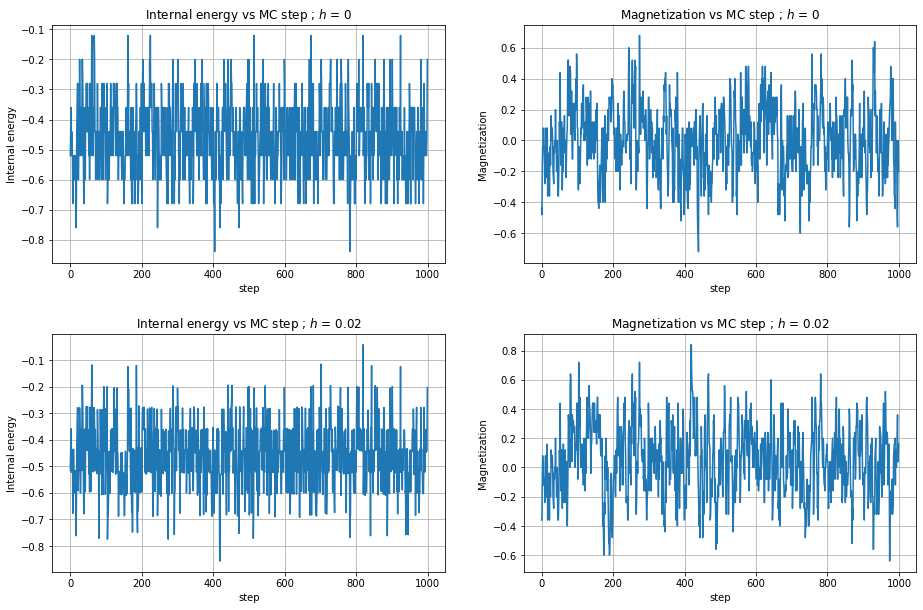

In [2]:
M=1000
x=np.arange(M)
data=np.zeros((4, M))

filename=["ene_ist_h0", "magn_ist_h0", "ene_ist", "magn_ist"]
i=0

for name in filename:
    j=0
    file=open("Es_lezione_06/" + name + ".out")
    for line in file.readlines():
        data[i][j]=line.split()[1]
        j+=1
    file.close()
    i+=1

f, canvas=plt.subplots(nrows=2, ncols=2)
title1=["Internal energy", "Magnetization"]
title2=["0", "0.02"]

for i in range(2):
    for j in range(2):
        canvas[i][j].plot(x, data[2*i+j])
        canvas[i][j].set_xlabel(r"step")
        canvas[i][j].set_ylabel(title1[j])
        canvas[i][j].set_title(title1[j] + " vs MC step ; $h$ = " + title2[i])
        canvas[i][j].grid(True)

plt.subplots_adjust(left=0.2, bottom=-0.7, right=2.2, top=1.2, wspace=0.2, hspace=0.3)

The plots show that the number of steps it takes to get to the equilibrum configuration is negligeble: after at most 100 steps both the magnetization and the energy appear to stabilize. By taking blocks longer than such number we are reasonably guaranteed that the starting fluctuations are well absorbed into the first block.

### Measurement
We then go on to the estimation of the physical quantities $U$, $c_V$, $M$ and $\chi$ as functions of the temperature, for $T\in[0.5 {\rm K}, 2.0 {\rm K}]$. The interval is partitioned by 16 points at distance $\Delta T=0.1{\rm K}$ one another. For each $T_n=0.5{\rm K}+n\Delta T$, $n=0,\dots, 15$, the simulation is run in both field configurations and with both algorithms for a number of $N=50$ blocks of $L=1000$ steps each. Uncertainties are estimated accordingly with the blocking method. 

In [3]:
## Theoretical curves
points=16
T1 = np.linspace(0.5, 2.0, num=points)
theo = np.zeros((4, points))
beta = 1/T1
J = 1.0
Ns = 50
th = np.tanh(J/T1)
thN= th**Ns
ch = 1/th
theo[0] = -J*( th + ch*thN )/( 1 + thN )
theo[1]=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

h=0.02
b=beta
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
theo[2]= (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
theo[3]=beta*np.exp(2*beta*J)*(1-thN)/(1+thN)


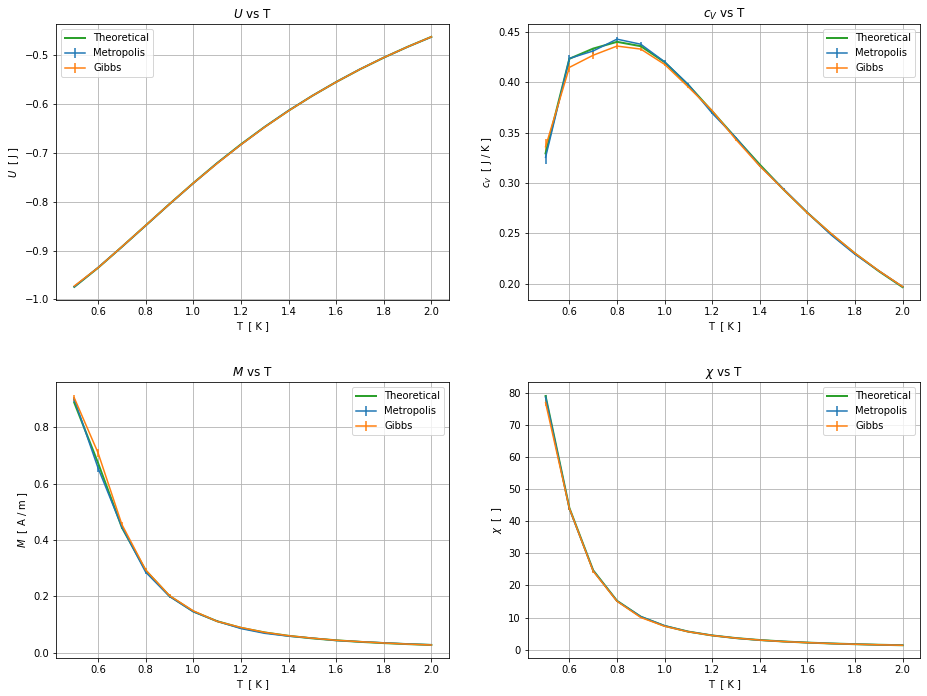

In [4]:
filename=["ene", "heatcap", "magn", "msusc"]
title1=["$U$", "$c_V$", "$M$", "$\chi$"]
measure=["J", "J / K", "A / m", ""]
T=np.arange(0.5, 2.1, 0.1)
Metropolis=np.zeros((4, 16))
Gibbs=np.zeros((4, 16))
err_M=np.zeros((4, 16))
err_G=np.zeros((4, 16))

i=0
for name in filename:
    j=0
    file=open("Es_lezione_06/" + name + "_M.dat")
    for line in file.readlines():
        Metropolis[i][j]=line.split()[1]
        err_M[i][j]=line.split()[2]
        j+=1
    file.close()
    j=0
    file=open("Es_lezione_06/" + name + "_G.dat")
    for line in file.readlines():
        Gibbs[i][j]=line.split()[1]
        err_G[i][j]=line.split()[2]
        j+=1
    file.close()
    i+=1
    
    
f, ax=plt.subplots(nrows=2, ncols=2)
for i in range(2):
    for j in range(2):
        ax[i][j].errorbar(T, Metropolis[2*i+j], yerr=err_M[2*i+j], label="Metropolis")
        ax[i][j].errorbar(T, Gibbs[2*i+j], yerr=err_G[2*i+j], label="Gibbs")
        ax[i][j].plot(T1, theo[2*i+j], linewidth=2, label="Theoretical")
        ax[i][j].set_xlabel(r"T  [ K ]")
        ax[i][j].set_ylabel(title1[2*i+j] + "  [ " + measure[2*i+j] + " ]")
        ax[i][j].set_title(title1[2*i+j] + " vs T")
        ax[i][j].grid(True)
        ax[i][j].legend()
    

plt.subplots_adjust(left=0.2, bottom=-0.7, right=2.2, top=1.5, wspace=0.2, hspace=0.3)

At 'high' temperatures (say above $1{\rm K}$) both algorithms give results that appear to lie on the theoretical curves extremely well (at least in the scale of the above plots). The estimated uncertainties are barely visible. To get a better view of the discrepancies we plot the difference between the theoretical curves and the estimation with the algorithms:

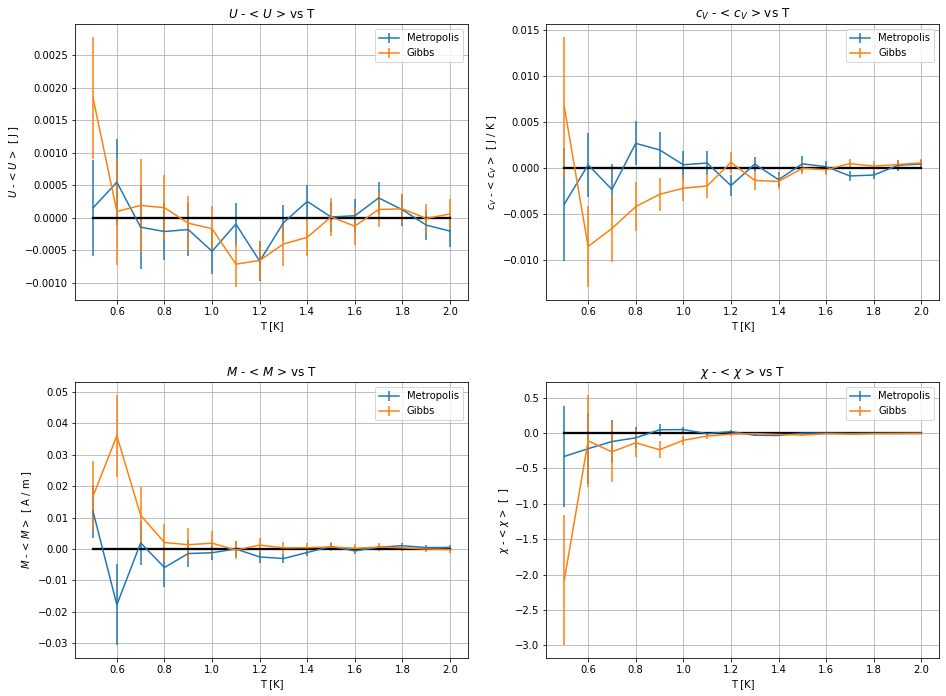

In [6]:
f, ax=plt.subplots(nrows=2, ncols=2)

for i in range(2):
    for j in range(2):
        ax[i][j].errorbar(T, Metropolis[2*i+j]-theo[2*i+j], yerr=err_M[2*i+j], label="Metropolis")
        ax[i][j].errorbar(T, Gibbs[2*i+j]-theo[2*i+j], yerr=err_G[2*i+j], label="Gibbs")
        ax[i][j].set_xlabel(r"T [K]")
        ax[i][j].set_ylabel(title1[2*i+j] + " - < " + title1[2*i+j] + " >" + "  [ " + measure[2*i+j] + " ]")
        ax[i][j].set_title(title1[2*i+j] + " - < " + title1[2*i+j] + " > vs T")
        ax[i][j].plot([0.5,2], [0,0], color="black", linewidth=2.3)
        ax[i][j].grid(True)
        ax[i][j].legend()
    

plt.subplots_adjust(left=0.2, bottom=-0.7, right=2.2, top=1.5, wspace=0.2, hspace=0.3)

In these plots it is easier to see how the discrepancies are bigger at low temperature and then tend to fade away as $T$ increases. The same goes for the uncertainties. This behaviour is less pronounced for the internal energy while it is crystal clear for the other quantities (see scales on the $y$-axis).

To be completely fair, the plots depict a far worse performance of the Gibbs algorithm at low temperatures than the Metropolis. The reason for this is that for large $\beta$ (i.e. low $T$) each of the two configurations with spins all-aligned should be more likely, but with the heat bath algorithm it is very improbable to make a transition between these two states: if one fixes a site $\nu$, the chance of it being flipped in a configuration where the nearest neighbors are all aligned (i.e. they all have the same value $\sigma\in\{-1,1\}$) is given by: 
$$
P(\sigma_\nu=-\sigma)=\dfrac{1}{1+\exp\bigl[\sigma2\beta J\sum_{\mu\in {\rm nn}(\nu)}\sigma_\mu\bigr]}=\dfrac{1}{1+\exp\bigl[\sigma^22\beta J\gamma\bigr]}\underset{\beta\to\infty}{\to}0
$$
where $\gamma\in\mathbb{N}$ is the number of nearest neighbors of each site for the chosen lattice ($\gamma=2$ in the 1D model). Hence, if the system gets stuck in one of the two states it is very unlikely it will reach the other in a reasonable number of steps.